### Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa.display
import librosa

from aplowpass import aplowpass

### Frequency Response

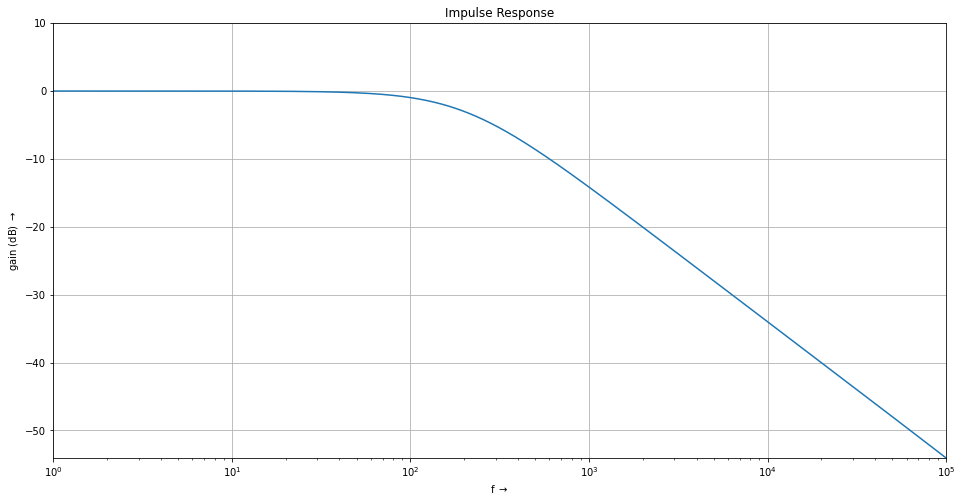

In [38]:
sr = 1000000
x = np.zeros(2*sr)
x[0]=1
fc = 100
y = aplowpass(x, 2*fc/sr)
fft_y = np.fft.rfft(y)
fft_y_dB = librosa.amplitude_to_db(np.abs(fft_y), ref=np.max)
f = np.linspace(0, fft_y_dB.size, fft_y_dB.size)

limiter = sr/10

min_index = int(limiter)
fft_min = fft_y_dB[min_index] # for a low-pass, the attanuation always
                              # increases for increasing frequency

fig, ax = plt.subplots(figsize=(16,8))
ax.semilogx(f, fft_y_dB)
ax.set(title=r"Impulse Response")
plt.ylabel(r"gain (dB) $\rightarrow$")
plt.xlabel(r"f $\rightarrow$")
plt.xlim(1, limiter)
plt.ylim(fft_min,10)
ax.grid()

### Test

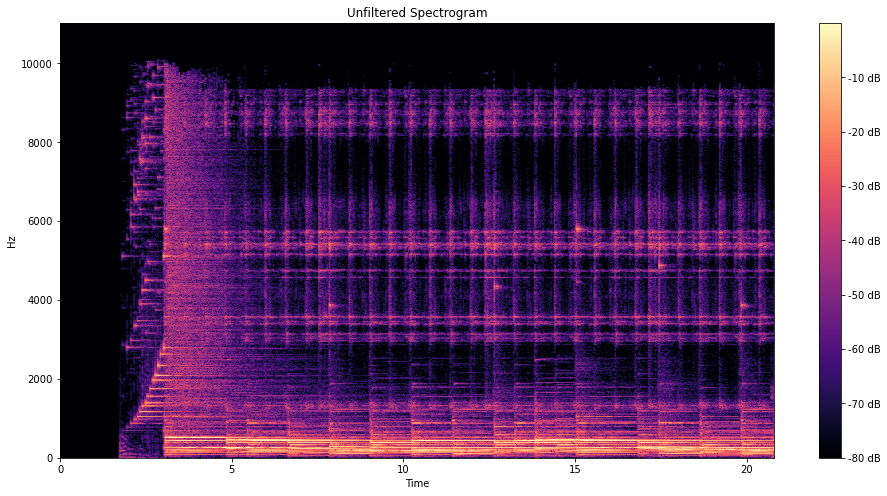

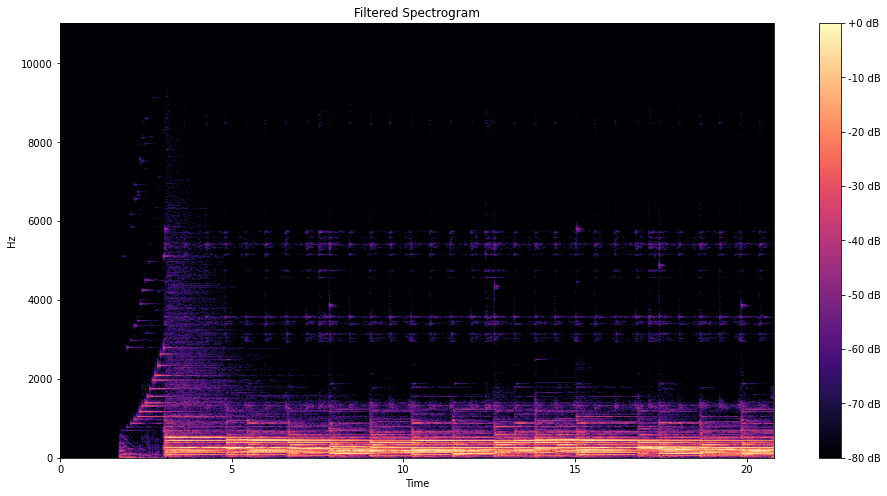

In [39]:
x, sr = librosa.load("./audios/deck_the_halls.wav", 44100)

x = x/x.max()

D_x = librosa.stft(x)  # STFT of x
S_db_x = librosa.amplitude_to_db(np.abs(D_x), ref=np.max)

fig, ax = plt.subplots(figsize=(16,8))
img = librosa.display.specshow(S_db_x, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Unfiltered Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

fc = 200
y = aplowpass(x, 2*fc/sr)

D_y = librosa.stft(y)  # STFT of y
S_db_y = librosa.amplitude_to_db(np.abs(D_y), ref=np.max)

fig, ax = plt.subplots(figsize=(16,8))
img = librosa.display.specshow(S_db_y, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Filtered Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

sf.write("./audios/deck_the_halls_rewrite_AP_LOW.wav", y*x.max(), 44100, 'PCM_24')